In [1]:
# importing libraries
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
print('Done Importing Libraries')

Done Importing Libraries


In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
data = pd.read_csv(url)

In [3]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [4]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
data=data.drop('Unnamed: 0',axis=1)
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [6]:
X=data.iloc[:, :-1].values
y=data.iloc[:, 4].values

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [8]:
training_accuracy = []
test_accuracy=[]
neighbors=range(1,11)

for number_of_neighbors in neighbors:
    KNN=KNeighborsClassifier(n_neighbors=number_of_neighbors)
    KNN.fit(X_train,y_train)
    training_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))

K=3


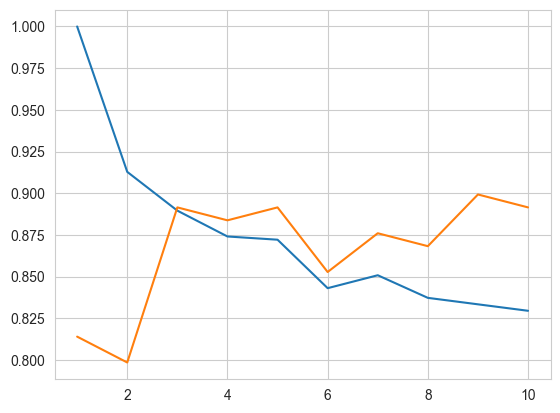

In [9]:
plt.plot(neighbors,training_accuracy,label="training_accuracy")
plt.plot(neighbors,test_accuracy,label="test_accuracy")
print("K=3")

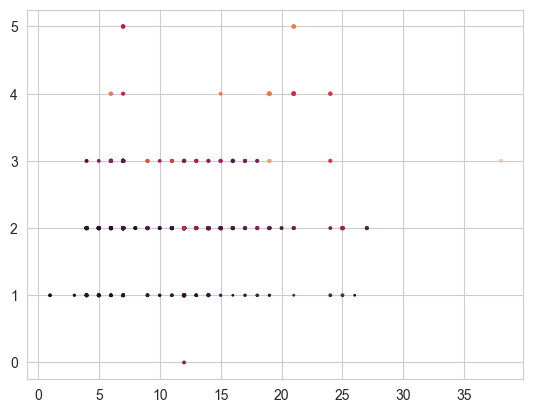

In [10]:
plt.scatter(data['TotalFloor'],data['Bathroom'],data['Bedroom'],data['Price'])

In [11]:
k=KMeans(n_clusters=3)
k

KMeans(n_clusters=3)

In [12]:
y_predict =k.fit_predict(data[['TotalFloor','Bathroom','Bedroom','Price']])
y_predict

array([0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2,

In [13]:
data['cluster']=y_predict

In [14]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]

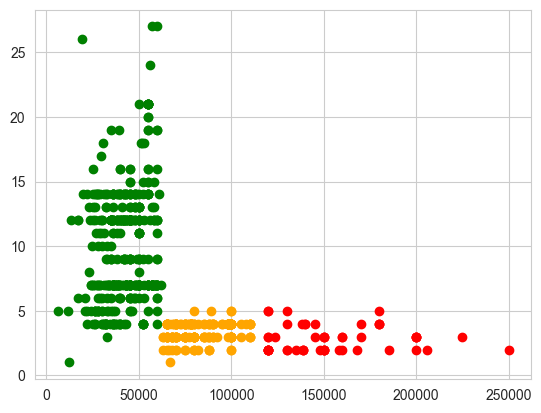

In [15]:
plt.scatter(df1.Price,df1['TotalFloor'],color='green')
plt.scatter(df2.Price,df2['Bathroom'],color='red')
plt.scatter(df3.Price,df3['Bedroom'],color='orange')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


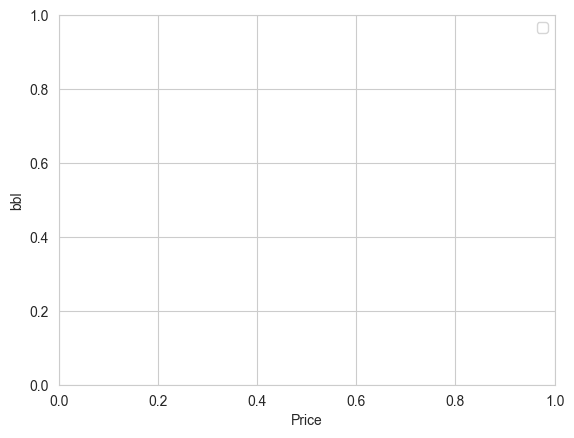

In [16]:
plt.xlabel('Price')
plt.ylabel('bbl')
plt.legend()